# ARIMA Models in Python - Part 3

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

%matplotlib inline

## Datasets

### Earthquake

In [68]:
earthquake_dataset = pd.read_csv('../datasets/time series/earthquakes.csv', index_col='date', parse_dates=True)
earthquake_dataset = earthquake_dataset.asfreq('AS')

### Sample

In [131]:
sample_dataset = pd.read_csv('../datasets/time series/sample2.csv', index_col=0, parse_dates=True)
sample_dataset = sample_dataset.asfreq('D')

### Savings

In [114]:
savings_dataset = pd.read_csv('../datasets/time series/savings.csv', index_col='date', parse_dates=['date'])
savings_dataset = savings_dataset.asfreq('QS')

## The Best of the Best Models
In this chapter, you will become a modeler of discerning taste. You'll learn how to identify promising model orders from the data itself, then, once the most promising models have been trained, you'll learn how to choose the best model from this fitted selection. You'll also learn a great framework for structuring your time series projects.

### AR or MA
In this exercise you will use the ACF and PACF to decide whether some data is best suited to an MA model or an AR model. Remember that selecting the right model order is of great importance to our predictions.

Remember that for different types of models we expect the following behavior in the ACF and PACF:

|      | AR(p) | MA(q) | ARMA(p,q) |
| :-- | :-- | :-- | :-- |
| ACF  | Tails off | Cuts off after lag q | Tails off |
| PACF | Cuts off after lag p | Tails off | Tails off |

A time series with unknown properties, `df` is available for you in your environment.

In [28]:
df = sample_dataset.copy()

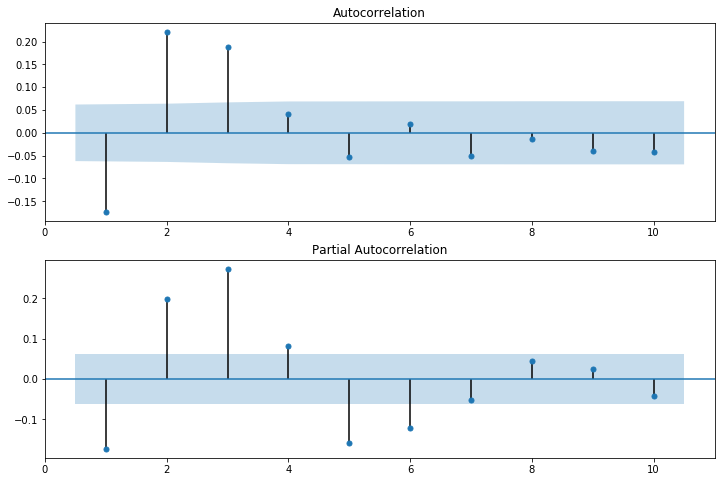

In [29]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot the ACF of df
plot_acf(df, lags=10, zero=False, ax=ax1)

# Plot the PACF of df
plot_pacf(df, lags=10, zero=False, ax=ax2);

Based on the ACF and PACF plots, what kind of model is this?
- MA(3)

### Order of earthquakes
In this exercise you will use the ACF and PACF plots to decide on the most appropriate order to forecast the earthquakes time series.

|      | AR(p) | MA(q) | ARMA(p,q) |
| :-- | :-- | :-- | :-- |
| ACF  | Tails off | Cuts off after lag q | Tails off |
| PACF | Cuts off after lag p | Tails off | Tails off |

The earthquakes time series earthquake, the `plot_acf()`, and `plot_pacf()` functions, and the `SARIMAX` model class are available in your environment.

In [69]:
earthquake = earthquake_dataset.copy()[['earthquakes_per_year']]

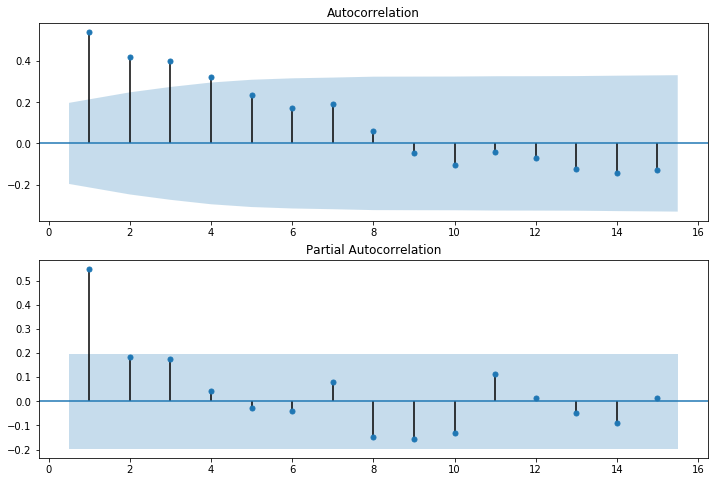

In [70]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot ACF and PACF
plot_acf(earthquake, lags=15, zero=False, ax=ax1)
plot_pacf(earthquake, lags=15, zero=False, ax=ax2);

Look at the ACF/PACF plots and the table above.

What is the most appropriate model for the earthquake data?

- AR(1)

Create and train a model object for the earthquakes time series.

In [25]:
# Instantiate model
model = SARIMAX(earthquake, order=(1, 0, 0))

In [26]:
# Train model
results = model.fit()

/Users/lukasz/.conda/envs/data-camp/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


### Searching over model order
In this exercise you are faced with a dataset which appears to be an ARMA model. You can see the ACF and PACF in the plot below. In order to choose the best order for this model you are going to have to do a search over lots of potential model orders to find the best set.

The `SARIMAX` model class and the time series DataFrame `df` are available in your environment.

In [36]:
df = sample_dataset.copy()

In [37]:
# Create empty list to store search results
order_aic_bic=[]

In [38]:
# Loop over p values from 0-2
for p in range(3):
  # Loop over q values from 0-2
    for q in range(3):
      	# create and fit ARMA(p,q) model
        model = SARIMAX(df, order=(p, 0, q))
        results = model.fit()

        # Append order and results tuple
        order_aic_bic.append((p, q, results.aic, results.bic))

### Choosing order with AIC and BIC
Now that you have performed a search over many model orders, you will evaluate your results to find the best model order.

The list of tuples of `(p,q, AIC value, BIC value)` that you created in the last exercise, `order_aic_bic`, is available in your environment. `pandas` has also been imported as `pd`.

In [39]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, columns=['p', 'q', 'AIC', 'BIC'])

In [40]:
# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

   p  q          AIC          BIC
8  2  2  2808.309189  2832.847965
5  1  2  2817.292441  2836.923462
2  0  2  2872.205748  2886.929013
7  2  1  2889.542335  2909.173356
6  2  0  2930.299481  2945.022747
4  1  1  2960.351104  2975.074370
3  1  0  2969.236399  2979.051910
1  0  1  2978.726909  2988.542419
0  0  0  2996.526734  3001.434489


In [41]:
# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

   p  q          AIC          BIC
8  2  2  2808.309189  2832.847965
5  1  2  2817.292441  2836.923462
2  0  2  2872.205748  2886.929013
7  2  1  2889.542335  2909.173356
6  2  0  2930.299481  2945.022747
4  1  1  2960.351104  2975.074370
3  1  0  2969.236399  2979.051910
1  0  1  2978.726909  2988.542419
0  0  0  2996.526734  3001.434489


Which of the following models is the best fit?
- ARMA(2,2)

### AIC and BIC vs ACF and PACF
In this exercise you will apply an AIC-BIC order search for the earthquakes time series. In the last lesson you decided that this dataset looked like an AR(1) process. You will do a grid search over parameters to see if you get the same results. The ACF and PACF plots for this dataset are shown below.

The `SARIMAX` model class and the time series DataFrame `earthquake` are available in your environment.

In [71]:
earthquake = earthquake_dataset.copy()[['earthquakes_per_year']]

In [72]:
# Loop over p values from 0-2
for p in range(3):
    # Loop over q values from 0-2
    for q in range(3):

        try:
            # create and fit ARMA(p,q) model
            model = SARIMAX(earthquake, order=(p, 0, q))
            results = model.fit()

            # Print order and results
            print(p, q, results.aic, results.bic)

        except:
            print(p, q, None, None)

0 0 888.4297722924081 891.0248921425426
0 1 799.6741727812197 804.8644124814889
0 2 761.0674787503888 768.8528383007925
1 0 666.6455255041611 671.8357652044303
1 1 647.13229996738 654.9176595177838
1 2 648.7385664620685 659.1190458626069
2 0 656.028374414639 663.8137339650427
2 1 648.8428399959366 659.223319396475
2 2 648.8506443418462 661.8262435925192


### Mean absolute error
Obviously, before you use the model to predict, you want to know how accurate your predictions are. The mean absolute error (MAE) is a good statistic for this. It is the mean difference between your predictions and the true values.

In this exercise you will calculate the MAE for an ARMA(1,1) model fit to the earthquakes time series

`numpy` has been imported into your environment as `np` and the earthquakes time series is available for you as `earthquake`.

In [73]:
earthquake = earthquake_dataset.copy()[['earthquakes_per_year']]

In [74]:
# Fit model
model = SARIMAX(earthquake, order=(2,0,2))
results = model.fit()

In [76]:
# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(results.resid))

In [78]:
# Print mean absolute error
print(mae)

4.658405206781709


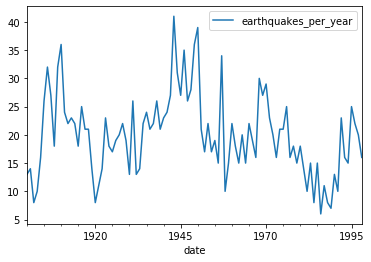

In [79]:
# Make plot of time series for comparison
earthquake.plot()
plt.show()

### Diagnostic summary statistics
It is important to know when you need to go back to the drawing board in model design. In this exercise you will use the residual test statistics in the results summary to decide whether a model is a good fit to a time series.

Here is a reminder of the tests in the model summary:

| Test | Null hypothesis | P-value name |
| :--- | :--- |:-------------|
| Ljung-Box | There are no correlations in the residual | Prob(Q)      |
| Jarque-Bera | The residuals are normally distributed | Prob(JB)     |

An unknown time series `df` and the `SARIMAX` model class are available for you in your environment.

In [88]:
df = sample_dataset.copy()
df = df.loc[:'2014-02-04']

In [89]:
# Create and fit model
model1 = SARIMAX(df, order=(3, 0, 1))
results1 = model1.fit()

In [90]:
# Print summary
print(results1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  400
Model:               SARIMAX(3, 0, 1)   Log Likelihood                -564.282
Date:                Fri, 31 Dec 2021   AIC                           1138.563
Time:                        19:53:23   BIC                           1158.520
Sample:                    01-01-2013   HQIC                          1146.466
                         - 02-04-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1011      0.172     -0.587      0.557      -0.439       0.236
ar.L2          0.2572      0.053      4.836      0.000       0.153       0.361
ar.L3          0.2417      0.057      4.224      0.0

Based on the outcomes of the tests in the summary, which of the following is correct about the residuals of results1?
- They are not correlated and are normally distributed.

In [91]:
# Create and fit model
model2 = SARIMAX(df, order=(2, 0, 0))
results2 = model2.fit()

In [92]:
# Print summary
print(results2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  400
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -578.986
Date:                Fri, 31 Dec 2021   AIC                           1163.971
Time:                        19:55:05   BIC                           1175.945
Sample:                    01-01-2013   HQIC                          1168.713
                         - 02-04-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1725      0.044     -3.926      0.000      -0.259      -0.086
ar.L2          0.1916      0.048      4.028      0.000       0.098       0.285
sigma2         1.0584      0.070     15.182      0.0

Based on the outcomes of the tests in the summary, which of the following is correct about the residuals of results2?
- They are correlated and are normally distributed.

### Plot diagnostics
It is important to know when you need to go back to the drawing board in model design. In this exercise you will use 4 common plots to decide whether a model is a good fit to some data.

Here is a reminder of what you would like to see in each of the plots for a model that fits well:

| Test | Good fit |
| :--- | :------- |
| Standardized residual | There are no obvious patterns in the residuals |
| Histogram plus kde estimate | The KDE curve should be very similar to the normal distribution |
| Normal Q-Q | Most of the data points should lie on the straight line |
| Correlogram | 95% of correlations for lag greater than zero should not be significant |

An unknown time series `df` and the `SARIMAX` model class are available for you in your environment.-

In [103]:
df = sample_dataset.copy()
df = df.loc[:'2013-10-27']

In [104]:
# Create and fit model
model = SARIMAX(df, order=(1, 1, 1))
results=model.fit()

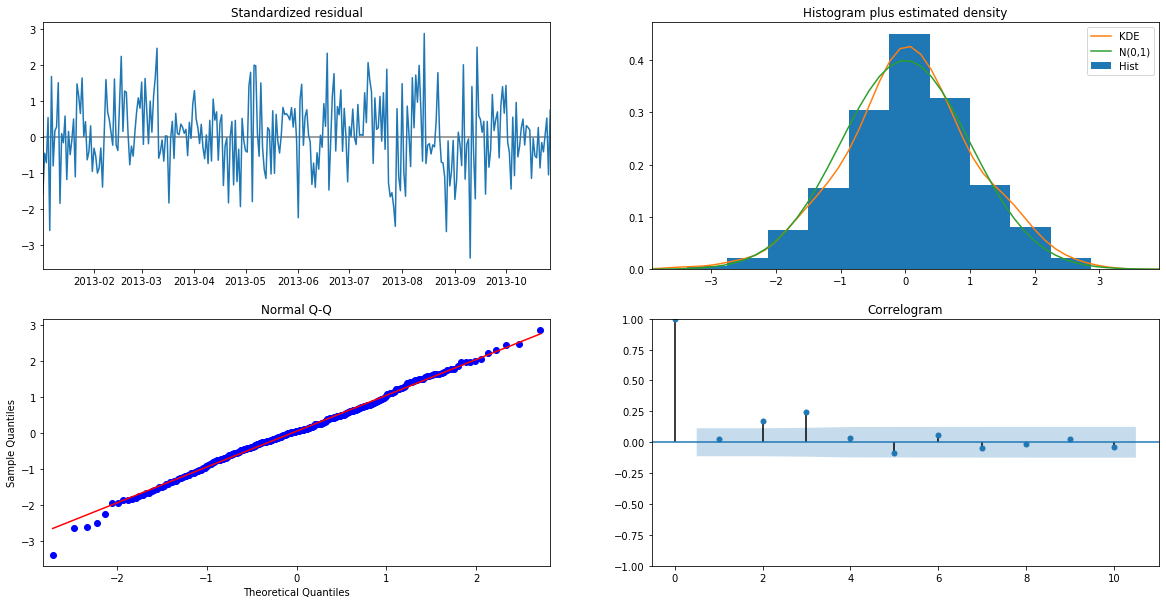

In [105]:
# Create the 4 diagostics plots
results.plot_diagnostics(figsize=(20,10));

Do these plots suggest that any of these are true about the model fit.
- NOT TRUE THAT The residuals are not normally distributed. You should try increasing d.
- NOT TRUE THAT The residuals are correlated. You should increase p or q.

### Identification
In the following exercises you will apply to the Box-Jenkins methodology to go from an unknown dataset to a model which is ready to make forecasts.

You will be using a new time series. This is the personal savings as % of disposable income 1955-1979 in the US.

The first step of the Box-Jenkins methodology is Identification. In this exercise you will use the tools at your disposal to test whether this new time series is stationary.

The time series has been loaded in as a DataFrame `savings` and the `adfuller()` function has been imported.

In [116]:
savings = savings_dataset.copy()

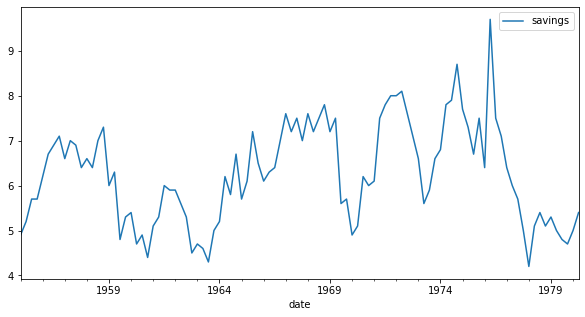

In [121]:
# Plot time series
savings.plot(figsize=(10,5));

In [118]:
# Run Dicky-Fuller test
result = adfuller(savings)

In [119]:
# Print test statistic
print(result[0])

-3.1858990962421414


In [120]:
# Print p-value
print(result[1])

0.020815541644114036


### Identification II
You learned that the `savings` time series is stationary without differencing. Now that you have this information you can try and identify what order of model will be the best fit.

The `plot_acf()` and the `plot_pacf()` functions have been imported and the time series has been loaded into the DataFrame `savings`.

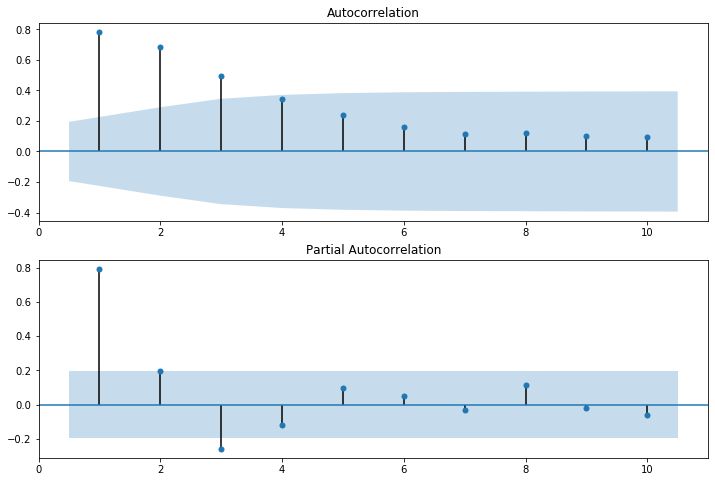

In [125]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot the ACF of savings on ax1
plot_acf(savings, lags=10, zero=False, ax=ax1);

# Plot the PACF of savings on ax2
plot_pacf(savings, lags=10, zero=False, ax=ax2);

### Estimation
In the last exercise, the ACF and PACF were a little inconclusive. The results suggest your data could be an ARMA(p,q) model or could be an imperfect AR(3) model. In this exercise you will search over models over some model orders to find the best one according to AIC.

The time series `savings` has been loaded and the `SARIMAX` class has been imported into your environment.

In [126]:
# Loop over p values from 0-3
for p in range(4):

  # Loop over q values from 0-3
    for q in range(4):
      try:
        # Create and fit ARMA(p,q) model
        model = SARIMAX(savings, order=(p, 0, q), trend='c')
        results = model.fit()

        # Print p, q, AIC, BIC
        print(p, q, results.aic, results.bic)

      except:
        print(p, q, None, None)

0 0 313.6028657326894 318.85281135925794
0 1 267.0697097688692 274.944628208722
0 2 232.16782676455597 242.66771801769306
0 3 217.5972051118876 230.72206917830897
1 0 216.2034806249964 224.0783990648492
1 1 215.7003898861629 226.2002811393
1 2 207.6529860843233 220.77785015074465
1 3 209.57498691602214 225.32482379572775
2 0 213.97232327542977 224.47221452856687
2 1 213.43035679117466 226.555220857596
2 2 209.57903436793566 225.3288712476413
2 3 211.57503208995598 229.94984178294587
3 0 209.54493107911713 222.6697951455385
3 1 210.82147634942115 226.57131322912676
3 2 211.45759881814814 229.83240851113803
3 3 213.5438905465976 234.54367305287175


### Diagnostics
You have arrived at the model diagnostic stage. So far you have found that the initial time series was stationary, but may have one outlying point. You identified promising model orders using the ACF and PACF and confirmed these insights by training a lot of models and using the AIC and BIC.

You found that the ARMA(1,2) model was the best fit to our data and now you want to check over the predictions it makes before you would move it into production.

The time series `savings` has been loaded and the `SARIMAX` class has been imported into your environment.

In [127]:
# Create and fit model
model = SARIMAX(savings, order=(1, 0, 2), trend='c')
results = model.fit()

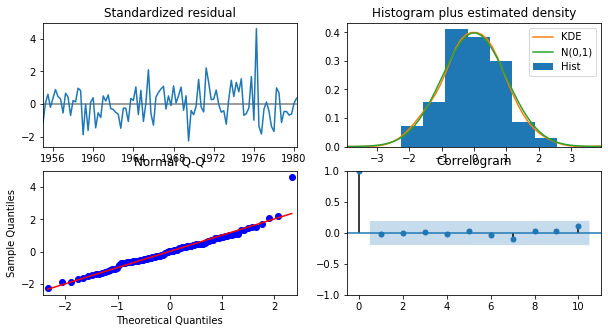

In [128]:
# Create the 4 diagostics plots
results.plot_diagnostics(figsize=(10,5));

In [129]:
# Print summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                savings   No. Observations:                  102
Model:               SARIMAX(1, 0, 2)   Log Likelihood                 -98.826
Date:                Sat, 01 Jan 2022   AIC                            207.653
Time:                        17:55:36   BIC                            220.778
Sample:                    01-01-1955   HQIC                           212.968
                         - 04-01-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.6813      0.714      2.356      0.018       0.283       3.080
ar.L1          0.7286      0.111      6.538      0.000       0.510       0.947
ma.L1         -0.0539      0.145     -0.372      0.7